In [53]:
from string import Template

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [54]:
def calculate_metrics(confusion_matrix):
    # Extract true positives, false positives, false negatives for each class
    TP = np.diag(confusion_matrix)
    FP = np.sum(confusion_matrix, axis=0) - TP
    FN = np.sum(confusion_matrix, axis=1) - TP
    TN = np.sum(confusion_matrix) - (TP + FP + FN)

    # Calculate accuracy, precision, recall, and F1-score for each class
    accuracy = np.sum(TP) / np.sum(confusion_matrix)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)
    # round everything to 3 decimal places
    TP = np.round(TP, 3)
    FP = np.round(FP, 3)
    TN = np.round(TN, 3)
    FN = np.round(FN, 3)
    accuracy = np.round(accuracy, 3)
    precision = np.round(precision, 3)
    recall = np.round(recall, 3)
    f1_score = np.round(f1_score, 3)
    return TP, FP, FN, TN, accuracy, precision, recall, f1_score

In [55]:
def plot(confusion_matrix, name=None, title=None):
    if title is None:
        title = 'Confusion Matrix'
    labels = ["not art.", "art."]
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    if name:
        plt.savefig(name, dpi=500)
    plt.show()


def metrics(confusion_matrix):
    TP, FP, FN, TN, accuracy, precision, recall, f1_score = calculate_metrics(confusion_matrix)

    # Create a dataframe to display the results
    results = pd.DataFrame({
        'Class': ['not art.', 'art.'],
        'Accuracy': [accuracy] * 2,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    })

    return results

In [56]:

def plot_sleep_scoring(confusion_matrix, name=None, title=None):
    if title is None:
        title = 'Confusion Matrix'
    # Create a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['NREM', 'REM', 'WAKE'],
                yticklabels=['NREM', 'REM', 'WAKE'], cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(title)
    if name:
        plt.savefig(name, dpi=500)
    plt.show()


def metrics_sleep_scoring(confusion_matrix):
    TP, FP, FN, TN, accuracy, precision, recall, f1_score = calculate_metrics(confusion_matrix)

    # Create a dataframe to display the results
    results = pd.DataFrame({
        'Class': ['NREM', 'REM', 'WAKE'],
        'Accuracy': [accuracy] * 3,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    })

    return results

In [57]:
def latex_image(name):
    latex_image = r"""
    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/$name.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:$name}
    \end{figure}
    """

    # Format the confusion matrix table with calculated values
    keys = { 'name': name}

    # Output the LaTeX tables
    print(Template(latex_image).safe_substitute(**keys))

In [58]:
def latex_sleep_score(conf_matrix, name):
    latex_image(name)
    # Calculate sum rows and sum columns
    sum_rows = np.sum(conf_matrix, axis=1)
    sum_cols = np.sum(conf_matrix, axis=0)
    grand_sum = np.sum(conf_matrix)

    TP, FP, FN, TN, accuracy, precision, recall, f1_score = calculate_metrics(confusion_matrix)

    # Generate LaTeX table for confusion matrix
    latex_conf_matrix = r"""
    \begin{table}[H]
        \centering
        \begin{tabular}{lrrr|r}
            \toprule
                  & NREM  & REM   & WAKE  & SUM \\
            \midrule
            NREM  & $NREM_NREM & $NREM_REM  & $NREM_WAKE  & $NREM_SUM \\
            REM   & $REM_NREM  & $REM_REM  & $REM_WAKE  & $REM_SUM \\
            WAKE  & $WAKE_NREM & $WAKE_REM & $WAKE_WAKE & $WAKE_SUM \\
            \midrule
            SUM   & $SUM_NREM  & $SUM_REM  & $SUM_WAKE  & $TOTAL_SUM \\
            \bottomrule
        \end{tabular}
        \caption{Epoch class distributions of the confusion matrix}
        \label{stat:$name}
    \end{table}
    """

    # Format the confusion matrix table with calculated values
    formatted_conf_matrix = {
        'NREM_NREM': conf_matrix[0, 0], 'NREM_REM': conf_matrix[0, 1], 'NREM_WAKE': conf_matrix[0, 2],
        'NREM_SUM': sum_rows[0], 'REM_NREM': conf_matrix[1, 0], 'REM_REM': conf_matrix[1, 1],
        'REM_WAKE': conf_matrix[1, 2],
        'REM_SUM': sum_rows[1], 'WAKE_NREM': conf_matrix[2, 0], 'WAKE_REM': conf_matrix[2, 1],
        'WAKE_WAKE': conf_matrix[2, 2], 'WAKE_SUM': sum_rows[2], 'SUM_NREM': sum_cols[0], 'SUM_REM': sum_cols[1],
        'SUM_WAKE': sum_cols[2], 'TOTAL_SUM': grand_sum, 'name': name
    }

    # Generate LaTeX table for metrics
    latex_metrics_table = r"""
    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
                NREM & $TP_NREM & $FP_NREM & $TN_NREM & $FN_NREM & $Acc_NREM & $Pre_NREM & $Rec_NREM & $F1_NREM \\
                REM & $TP_REM & $FP_REM & $TN_REM & $FN_REM & $Acc_REM & $Pre_REM & $Rec_REM & $F1_REM \\
                WAKE & $TP_WAKE & $FP_WAKE & $TN_WAKE & $FN_WAKE & $Acc_WAKE & $Pre_WAKE & $Rec_WAKE & $F1_WAKE \\
            \bottomrule
        \end{tabular}
        \caption{TP, FP, TN, FN class distributions and metrics}
        \label{cm:$name}
    \end{table}
    """

    # Format the metrics table with calculated values
    formatted_metrics_table = {
        'TP_NREM': TP[0], 'FP_NREM': FP[0], 'TN_NREM': TN[0], 'FN_NREM': FN[0], 'Acc_NREM': '     ',
        'Pre_NREM': precision[0], 'Rec_NREM': recall[0], 'F1_NREM': f1_score[0], 'TP_REM': TP[1], 'FP_REM': FP[1],
        'TN_REM': TN[1], 'FN_REM': FN[1], 'Acc_REM': accuracy, 'Pre_REM': precision[1], 'Rec_REM': recall[1],
        'F1_REM': f1_score[1], 'TP_WAKE': TP[2], 'FP_WAKE': FP[2], 'TN_WAKE': TN[2], 'FN_WAKE': FN[2],
        'Acc_WAKE': '     ',
        'Pre_WAKE': precision[2], 'Rec_WAKE': recall[2], 'F1_WAKE': f1_score[2], 'name': name
    }

    # Output the LaTeX tables
    print(Template(latex_conf_matrix).safe_substitute(**formatted_conf_matrix))
    print(Template(latex_metrics_table).safe_substitute(**formatted_metrics_table))


In [59]:
def latex_artifact_detection(conf_matrix, name):
    latex_image(name)
    # Calculate sum rows and sum columns
    sum_rows = np.sum(conf_matrix, axis=1)
    sum_cols = np.sum(conf_matrix, axis=0)
    grand_sum = np.sum(conf_matrix)

    TP, FP, FN, TN, accuracy, precision, recall, f1_score = calculate_metrics(conf_matrix)

    # Generate LaTeX table for confusion matrix
    latex_conf_matrix = r"""
    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & $NOTART_NOTART & $NOTART_ART  & $NOTART_SUM \\
            art.   & $ART_NOTART  & $ART_ART  & $ART_SUM \\
            \midrule
            SUM   & $SUM_NOTART  & $SUM_ART  & $TOTAL_SUM \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:$name}
    \end{table}
    """

    # Format the confusion matrix table with calculated values
    formatted_conf_matrix = {
        'NOTART_NOTART': conf_matrix[0, 0], 'NOTART_ART': conf_matrix[0, 1],
        'NOTART_SUM': sum_rows[0], 'ART_NOTART': conf_matrix[1, 0], 'ART_ART': conf_matrix[1, 1],
        'ART_SUM': sum_rows[1], 'SUM_NOTART': sum_cols[0], 'SUM_ART': sum_cols[1],
        'TOTAL_SUM': grand_sum, 'name': name
    }

    # Generate LaTeX table for metrics
    latex_metrics_table = r"""
    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
            not art. & $TP_NOTART & $FP_NOTART & $TN_NOTART & $FN_NOTART & $Acc_NOTART & $Pre_NOTART & $Rec_NOTART & $F1_NOTART \\
            art. & $TP_ART & $FP_ART & $TN_ART & $FN_ART & $Acc_ART & $Pre_ART & $Rec_ART & $F1_ART \\
            \bottomrule
        \end{tabular}
        \caption{TP, FP, TN, FN class distributions and metrics}
        \label{cm:$name}
    \end{table}
    """

    # Format the metrics table with calculated values
    formatted_metrics_table = {
        'TP_NOTART': TP[0], 'FP_NOTART': FP[0], 'TN_NOTART': TN[0], 'FN_NOTART': FN[0], 'Acc_NOTART': accuracy,
        'Pre_NOTART': precision[0], 'Rec_NOTART': recall[0], 'F1_NOTART': f1_score[0], 'TP_ART': TP[1], 'FP_ART': FP[1],
        'TN_ART': TN[1], 'FN_ART': FN[1], 'Acc_ART': '     ', 'Pre_ART': precision[1], 'Rec_ART': recall[1],
        'F1_ART': f1_score[1], 'name': name
    }

    # Output the LaTeX tables
    print(Template(latex_conf_matrix).safe_substitute(**formatted_conf_matrix))
    print(Template(latex_metrics_table).safe_substitute(**formatted_metrics_table))

# Supervised - SPINDLE - Artifact Detection - KornumLab

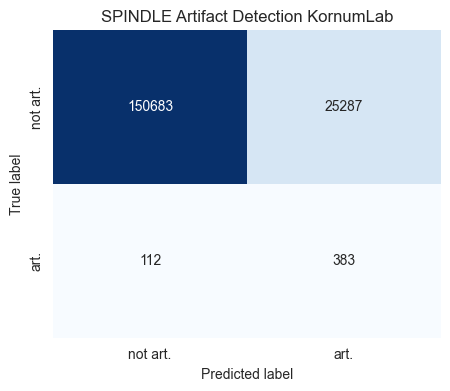

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.856,0.999,0.856,0.922
1,art.,0.856,0.015,0.774,0.029


In [60]:
confusion_matrix = np.array([
    [150683, 25287],
    [112, 383],
])
plot(confusion_matrix, 'supervised_spindle_artifact_detection_kornum.png', 'SPINDLE Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)

In [61]:
latex_artifact_detection(confusion_matrix, 'supervised_spindle_artifact_detection_kornum')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/supervised_spindle_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:supervised_spindle_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 150683 & 25287  & 175970 \\
            art.   & 112  & 383  & 495 \\
            \midrule
            SUM   & 150795  & 25670  & 176465 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:supervised_spindle_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
            not

# Supervised - SPINDLE - Artifact Detection - BrownLab

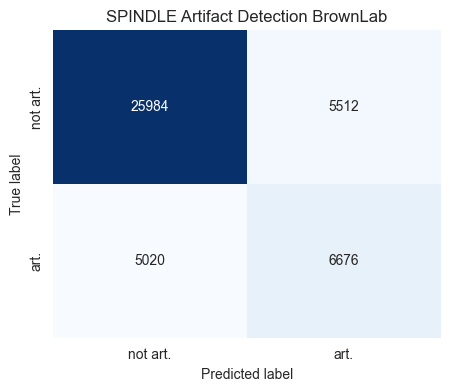

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.756,0.838,0.825,0.831
1,art.,0.756,0.548,0.571,0.559


In [62]:
confusion_matrix = np.array([
    [25984, 5512],
    [5020, 6676],
])

plot(confusion_matrix, 'supervised_spindle_artifact_detection_brown.png', 'SPINDLE Artifact Detection BrownLab')

results = metrics(confusion_matrix)
round(results, 3)


In [63]:
latex_artifact_detection(confusion_matrix, 'supervised_spindle_artifact_detection_brown')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/supervised_spindle_artifact_detection_brown.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:supervised_spindle_artifact_detection_brown}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 25984 & 5512  & 31496 \\
            art.   & 5020  & 6676  & 11696 \\
            \midrule
            SUM   & 31004  & 12188  & 43192 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:supervised_spindle_artifact_detection_brown}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
            not art

# Unsupervised - SPINDLE - Artifact Detection - KornumLab

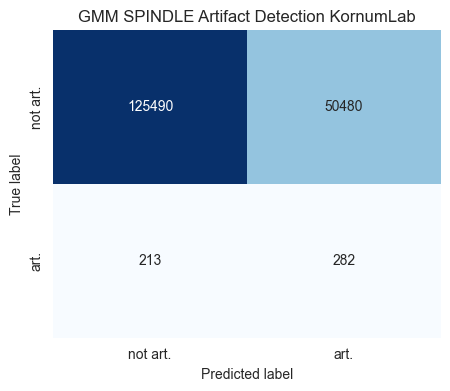

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.713,0.998,0.713,0.832
1,art.,0.713,0.006,0.570,0.011


In [64]:
confusion_matrix = np.array([
    [125490, 50480],
    [213, 282],
])

plot(confusion_matrix, 'unsupervised_spindle_artifact_detection_kornum.png', 'GMM SPINDLE Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)


In [65]:
latex_artifact_detection(confusion_matrix, 'unsupervised_spindle_artifact_detection_kornum')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/unsupervised_spindle_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:unsupervised_spindle_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 125490 & 50480  & 175970 \\
            art.   & 213  & 282  & 495 \\
            \midrule
            SUM   & 125703  & 50762  & 176465 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:unsupervised_spindle_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
         

# Unsupervised - SPINDLE - Artifact Detection - BrownLab

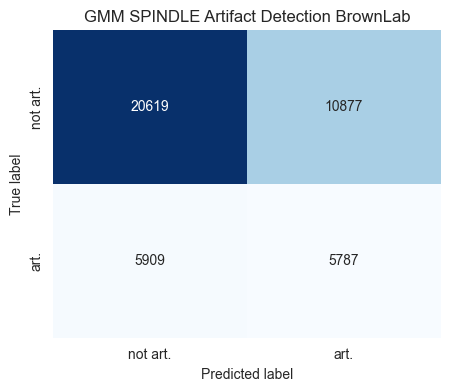

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.611,0.777,0.655,0.711
1,art.,0.611,0.347,0.495,0.408


In [66]:
confusion_matrix = np.array([
    [20619, 10877],
    [5909, 5787],
])

plot(confusion_matrix, 'unsupervised_spindle_artifact_detection_brown.png', 'GMM SPINDLE Artifact Detection BrownLab')

results = metrics(confusion_matrix)
round(results, 3)


In [67]:
latex_artifact_detection(confusion_matrix, 'unsupervised_spindle_artifact_detection_brown')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/unsupervised_spindle_artifact_detection_brown.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:unsupervised_spindle_artifact_detection_brown}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 20619 & 10877  & 31496 \\
            art.   & 5909  & 5787  & 11696 \\
            \midrule
            SUM   & 26528  & 16664  & 43192 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:unsupervised_spindle_artifact_detection_brown}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
            

# Supervised - L-SeqSleepNet - Artifact Detection - KornumLab

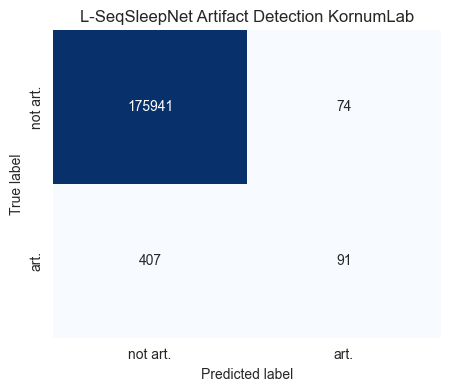

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.997,0.998,1.000,0.999
1,art.,0.997,0.552,0.183,0.275


In [68]:
confusion_matrix = np.array([
    [175941, 74],
    [407, 91],
])

plot(confusion_matrix, 'supervised_lseqsleepnet_artifact_detection_kornum.png',
     'L-SeqSleepNet Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)

In [69]:
latex_artifact_detection(confusion_matrix, 'supervised_lseqsleepnet_artifact_detection_kornum')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/supervised_lseqsleepnet_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:supervised_lseqsleepnet_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 175941 & 74  & 176015 \\
            art.   & 407  & 91  & 498 \\
            \midrule
            SUM   & 176348  & 165  & 176513 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:supervised_lseqsleepnet_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
      

# Supervised - L-SeqSleepNet - Artifact Detection - BrownLab

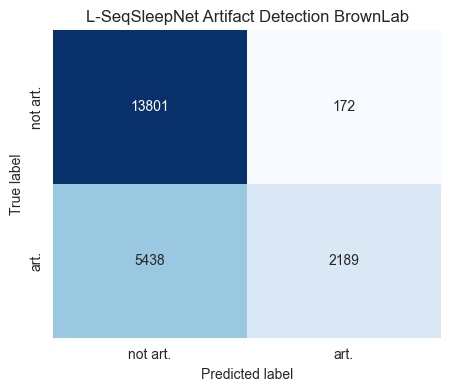

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.74,0.717,0.988,0.831
1,art.,0.74,0.927,0.287,0.438


In [70]:
confusion_matrix = np.array([
    [13801, 172],
    [5438, 2189],
])

plot(confusion_matrix, 'supervised_lseqsleepnet_artifact_detection_brown.png',
     'L-SeqSleepNet Artifact Detection BrownLab')

results = metrics(confusion_matrix)
round(results, 3)

In [71]:
latex_artifact_detection(confusion_matrix, 'supervised_lseqsleepnet_artifact_detection_brown')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/supervised_lseqsleepnet_artifact_detection_brown.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:supervised_lseqsleepnet_artifact_detection_brown}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 13801 & 172  & 13973 \\
            art.   & 5438  & 2189  & 7627 \\
            \midrule
            SUM   & 19239  & 2361  & 21600 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:supervised_lseqsleepnet_artifact_detection_brown}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
       

# Supervised - SPINDLE - Sleep Scoring - KornumLab

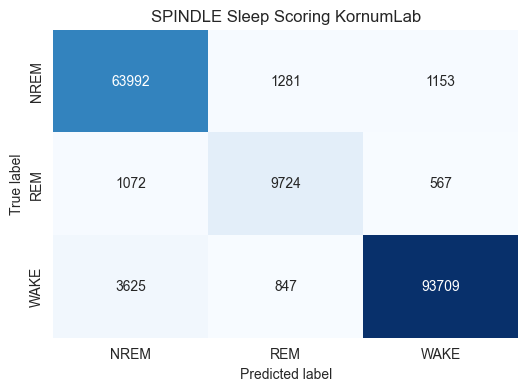

,Class,Accuracy,Precision,Recall,F1-Score
0,NREM,0.951,0.932,0.963,0.947
1,REM,0.951,0.820,0.856,0.838
2,WAKE,0.951,0.982,0.954,0.968


In [72]:
confusion_matrix = np.array([[63992, 1281, 1153],
                             [1072, 9724, 567],
                             [3625, 847, 93709]])
plot_sleep_scoring(confusion_matrix, 'supervised_spindle_sleep_scoring_kornum.png', 'SPINDLE Sleep Scoring KornumLab')

results = metrics_sleep_scoring(confusion_matrix)
round(results, 3)

In [73]:
latex_sleep_score(confusion_matrix, 'supervised_spindle_sleep_scoring_kornum')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/supervised_spindle_sleep_scoring_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:supervised_spindle_sleep_scoring_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrrr|r}
            \toprule
                  & NREM  & REM   & WAKE  & SUM \\
            \midrule
            NREM  & 63992 & 1281  & 1153  & 66426 \\
            REM   & 1072  & 9724  & 567  & 11363 \\
            WAKE  & 3625 & 847 & 93709 & 98181 \\
            \midrule
            SUM   & 68689  & 11852  & 95429  & 175970 \\
            \bottomrule
        \end{tabular}
        \caption{Epoch class distributions of the confusion matrix}
        \label{stat:supervised_spindle_sleep_scoring_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &

# Supervised - SPINDLE - Sleep Scoring - BrownLab

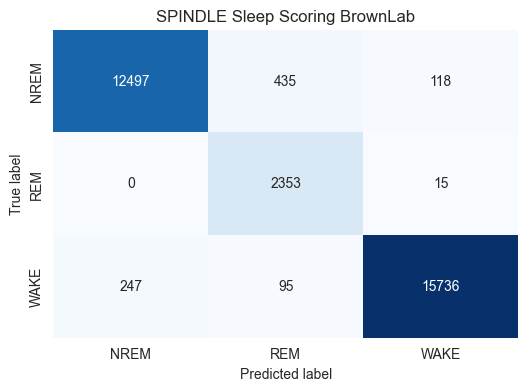

,Class,Accuracy,Precision,Recall,F1-Score
0,NREM,0.971,0.981,0.958,0.969
1,REM,0.971,0.816,0.994,0.896
2,WAKE,0.971,0.992,0.979,0.985


In [74]:
confusion_matrix = np.array([[12497, 435, 118],
                             [0, 2353, 15],
                             [247, 95, 15736]])

plot_sleep_scoring(confusion_matrix, 'supervised_spindle_sleep_scoring_brown.png', 'SPINDLE Sleep Scoring BrownLab')

results = metrics_sleep_scoring(confusion_matrix)
round(results, 3)

In [75]:
latex_sleep_score(confusion_matrix, 'supervised_spindle_sleep_scoring_brown')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/supervised_spindle_sleep_scoring_brown.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:supervised_spindle_sleep_scoring_brown}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrrr|r}
            \toprule
                  & NREM  & REM   & WAKE  & SUM \\
            \midrule
            NREM  & 12497 & 435  & 118  & 13050 \\
            REM   & 0  & 2353  & 15  & 2368 \\
            WAKE  & 247 & 95 & 15736 & 16078 \\
            \midrule
            SUM   & 12744  & 2883  & 15869  & 31496 \\
            \bottomrule
        \end{tabular}
        \caption{Epoch class distributions of the confusion matrix}
        \label{stat:supervised_spindle_sleep_scoring_brown}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. 

# Supervised L-SeqSleepNet - Sleep Scoring - KornumLab

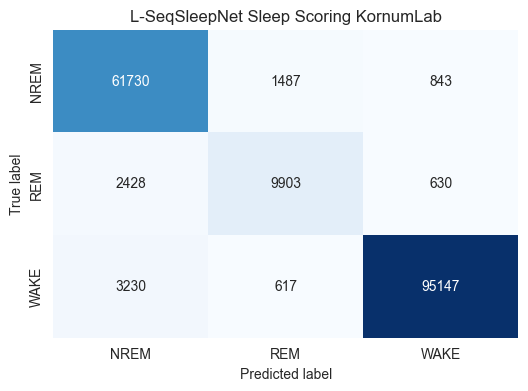

,Class,Accuracy,Precision,Recall,F1-Score
0,NREM,0.948,0.916,0.964,0.939
1,REM,0.948,0.825,0.764,0.793
2,WAKE,0.948,0.985,0.961,0.973


In [76]:
confusion_matrix = np.array([[61730, 1487, 843],
                             [2428, 9903, 630],
                             [3230, 617, 95147]])

plot_sleep_scoring(confusion_matrix, 'supervised_lseqsleepnet_sleep_scoring_kornum.png',
                   'L-SeqSleepNet Sleep Scoring KornumLab')

results = metrics_sleep_scoring(confusion_matrix)
round(results, 3)

In [77]:
latex_sleep_score(confusion_matrix, 'supervised_lseqsleepnet_sleep_scoring_kornum')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/supervised_lseqsleepnet_sleep_scoring_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:supervised_lseqsleepnet_sleep_scoring_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrrr|r}
            \toprule
                  & NREM  & REM   & WAKE  & SUM \\
            \midrule
            NREM  & 61730 & 1487  & 843  & 64060 \\
            REM   & 2428  & 9903  & 630  & 12961 \\
            WAKE  & 3230 & 617 & 95147 & 98994 \\
            \midrule
            SUM   & 67388  & 12007  & 96620  & 176015 \\
            \bottomrule
        \end{tabular}
        \caption{Epoch class distributions of the confusion matrix}
        \label{stat:supervised_lseqsleepnet_sleep_scoring_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &  

# Supervised L-SeqSleepNet - Sleep Scoring - BrownLab

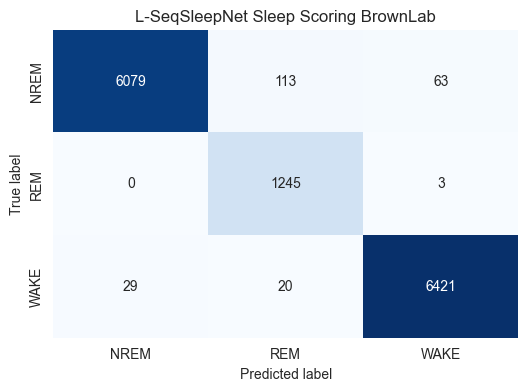

,Class,Accuracy,Precision,Recall,F1-Score
0,NREM,0.984,0.995,0.972,0.983
1,REM,0.984,0.903,0.998,0.948
2,WAKE,0.984,0.990,0.992,0.991


In [78]:
confusion_matrix = np.array([[6079, 113, 63],
                             [0, 1245, 3],
                             [29, 20, 6421]])

plot_sleep_scoring(confusion_matrix, 'supervised_lseqsleepnet_sleep_scoring_brown.png',
                   'L-SeqSleepNet Sleep Scoring BrownLab')

results = metrics_sleep_scoring(confusion_matrix)
round(results, 3)

In [79]:
latex_sleep_score(confusion_matrix, 'supervised_lseqsleepnet_sleep_scoring_brown')


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/supervised_lseqsleepnet_sleep_scoring_brown.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:supervised_lseqsleepnet_sleep_scoring_brown}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrrr|r}
            \toprule
                  & NREM  & REM   & WAKE  & SUM \\
            \midrule
            NREM  & 6079 & 113  & 63  & 6255 \\
            REM   & 0  & 1245  & 3  & 1248 \\
            WAKE  & 29 & 20 & 6421 & 6470 \\
            \midrule
            SUM   & 6108  & 1378  & 6487  & 13973 \\
            \bottomrule
        \end{tabular}
        \caption{Epoch class distributions of the confusion matrix}
        \label{stat:supervised_lseqsleepnet_sleep_scoring_brown}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN & 

# Unsupervised - L-SeqSleepNet - Artifact Detection - KornumLab

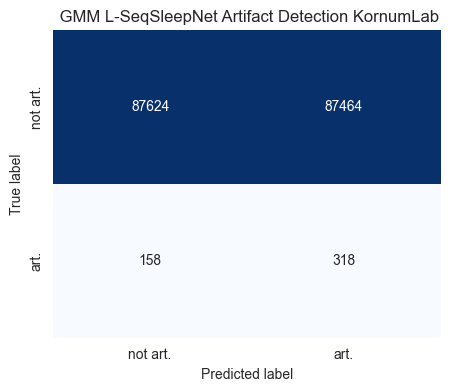

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.501,0.998,0.500,0.667
1,art.,0.501,0.004,0.668,0.007


In [80]:
confusion_matrix = np.array(np.array([
    [7009936, 6997146],
    [12664, 25454],
])/ 80, dtype=int) 
name = 'unsupervised_lseqsleepnet_artifact_detection_kornum'
plot(confusion_matrix, f'{name}.png',
     ' GMM L-SeqSleepNet Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)

In [81]:
latex_artifact_detection(confusion_matrix, name)


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/unsupervised_lseqsleepnet_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:unsupervised_lseqsleepnet_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 87624 & 87464  & 175088 \\
            art.   & 158  & 318  & 476 \\
            \midrule
            SUM   & 87782  & 87782  & 175564 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:unsupervised_lseqsleepnet_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midr

# All

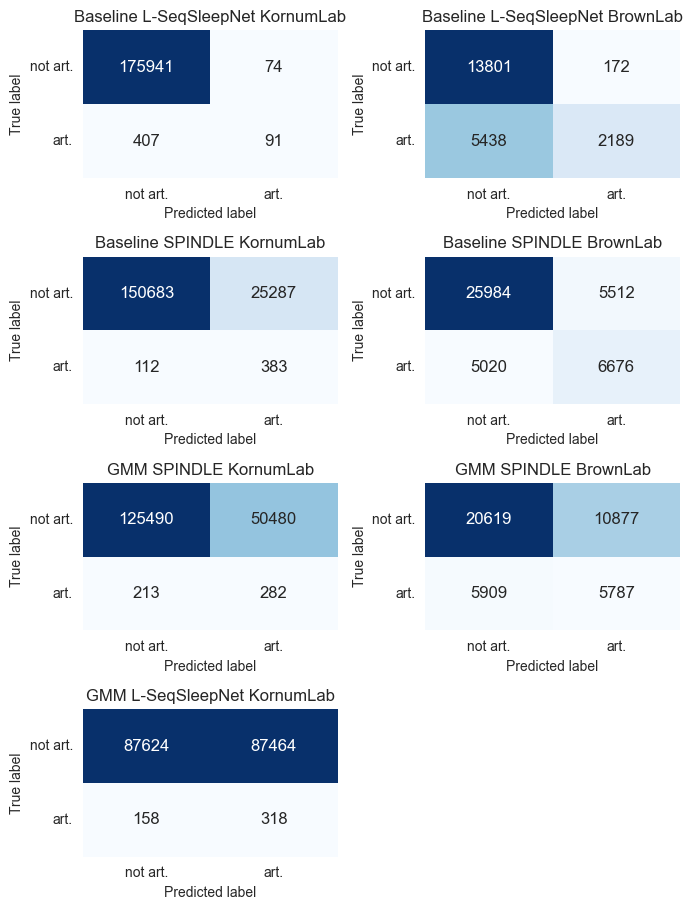

In [82]:
# Confusion matrices data
confusion_matrices = {
    "Baseline L-SeqSleepNet KornumLab": np.array([[175941, 74], [407, 91]]),
    "Baseline L-SeqSleepNet BrownLab": np.array([[13801, 172], [5438, 2189]]),
    "Baseline SPINDLE KornumLab": np.array([[150683, 25287], [112, 383]]),
    "Baseline SPINDLE BrownLab": np.array([[25984, 5512], [5020, 6676]]),
    "GMM SPINDLE KornumLab": np.array([[125490, 50480], [213, 282]]),
    "GMM SPINDLE BrownLab": np.array([[20619, 10877], [5909, 5787]]),
    "GMM L-SeqSleepNet KornumLab": np.array([[87624, 87464], [158, 318]]),
}

# Plotting heatmaps
fig, axes = plt.subplots(4, 2, figsize=(7, 10))
# fig.suptitle('Confusion Matrices Artifact Detection')

for ax, (title, matrix) in zip(axes.flatten(), confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, annot_kws={"size": 12})
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticklabels(['not art.', 'art.'])
    ax.set_yticklabels(['not art.', 'art.'], rotation=0)

axes[-1,-1].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('confusion_matrices_artifact_detection.png', dpi=500)
plt.show()


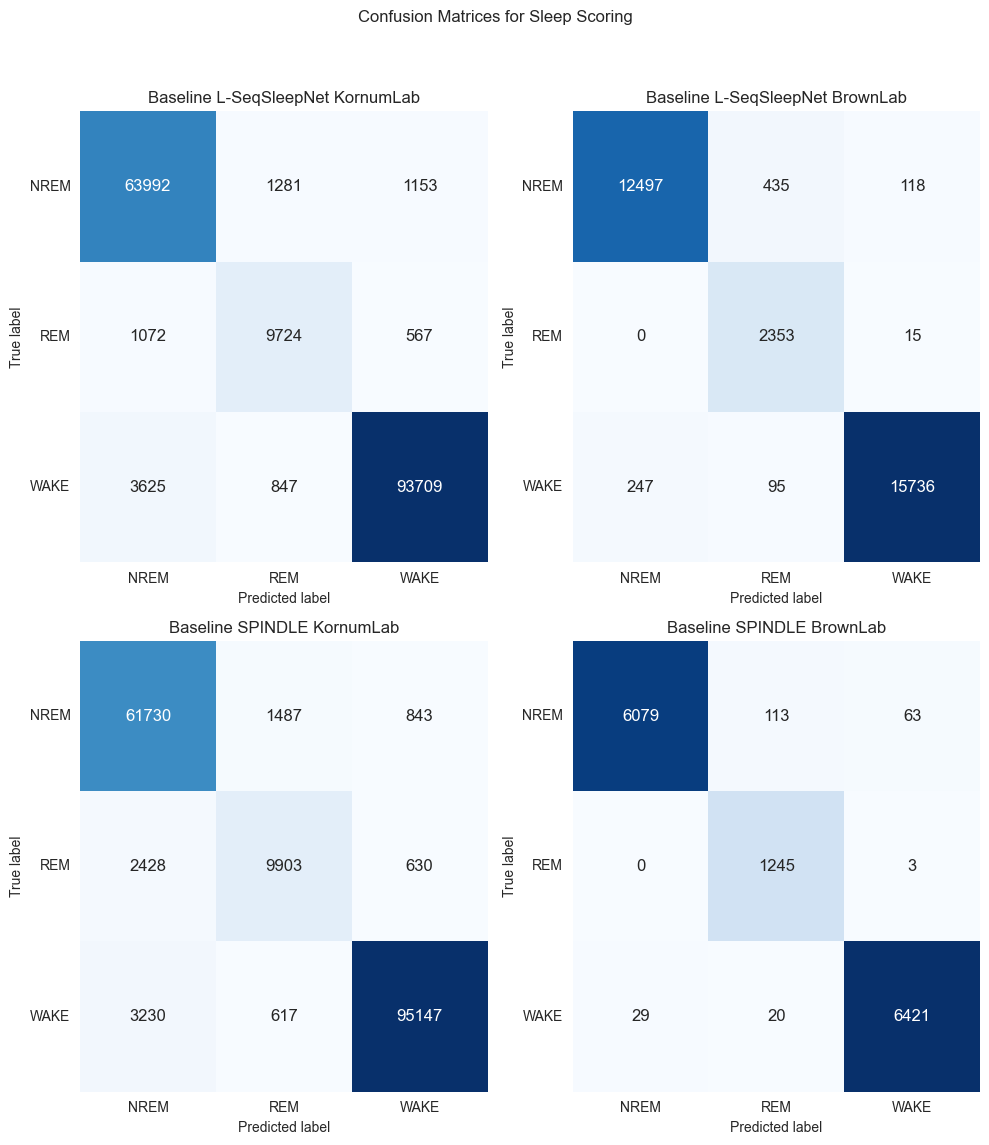

In [83]:
# Confusion matrices data from the uploaded files
confusion_matrices = {
    "Baseline L-SeqSleepNet KornumLab": np.array([[63992, 1281, 1153], [1072, 9724, 567], [3625, 847, 93709]]),
    "Baseline L-SeqSleepNet BrownLab": np.array([[12497, 435, 118], [0, 2353, 15], [247, 95, 15736]]),
    "Baseline SPINDLE KornumLab": np.array([[61730, 1487, 843], [2428, 9903, 630], [3230, 617, 95147]]),
    "Baseline SPINDLE BrownLab": np.array([[6079, 113, 63], [0, 1245, 3], [29, 20, 6421]])
}

# Plotting heatmaps
fig, axes = plt.subplots(2, 2, figsize=(10, 12))
fig.suptitle('Confusion Matrices for Sleep Scoring')

for ax, (title, matrix) in zip(axes.flatten(), confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, annot_kws={"size": 12})
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticklabels(['NREM', 'REM', 'WAKE'])
    ax.set_yticklabels(['NREM', 'REM', 'WAKE'], rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('confusion_matrices_sleep_scoring.png', dpi=500)
plt.show()


# Dense100 Autoencoder - Artifact detection - KornumLab

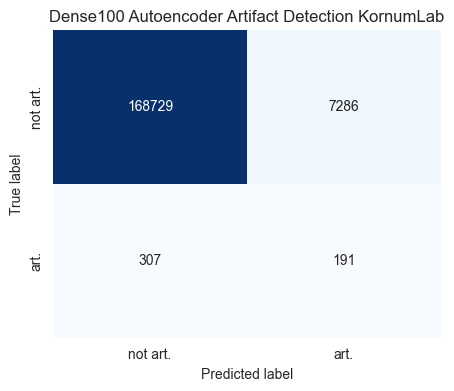

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.957,0.998,0.959,0.978
1,art.,0.957,0.026,0.384,0.048


In [84]:
confusion_matrix = np.array([
    [168729, 7286],
    [307, 191],
])
name = 'autoencoder_dense100_artifact_detection_kornum'
plot(confusion_matrix, f'{name}.png',
     'Dense100 Autoencoder Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)

In [85]:
latex_artifact_detection(confusion_matrix, name)


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/autoencoder_dense100_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:autoencoder_dense100_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 168729 & 7286  & 176015 \\
            art.   & 307  & 191  & 498 \\
            \midrule
            SUM   & 169036  & 7477  & 176513 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:autoencoder_dense100_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
           

# Dense600 Autoencoder - Artifact detection - KornumLab

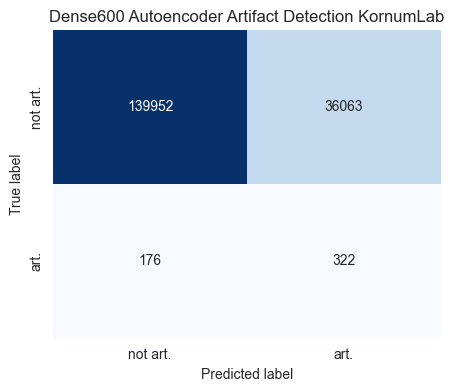

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.795,0.999,0.795,0.885
1,art.,0.795,0.009,0.647,0.017


In [86]:
confusion_matrix = np.array([
    [139952, 36063],
    [176, 322],
])
name = 'autoencoder_dense600_artifact_detection_kornum'
plot(confusion_matrix, f'{name}.png',
     'Dense600 Autoencoder Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)

In [87]:
latex_artifact_detection(confusion_matrix, name)


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/autoencoder_dense600_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:autoencoder_dense600_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 139952 & 36063  & 176015 \\
            art.   & 176  & 322  & 498 \\
            \midrule
            SUM   & 140128  & 36385  & 176513 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:autoencoder_dense600_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
         

# 1D-CNN100 Autoencoder - Artifact detection - KornumLab

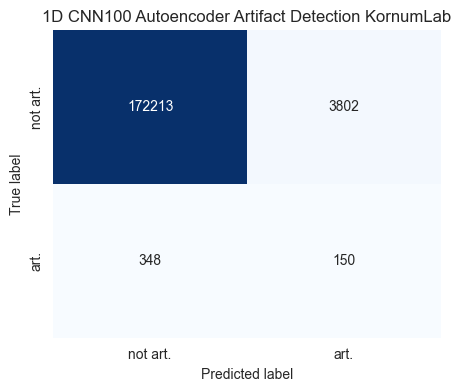

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.976,0.998,0.978,0.988
1,art.,0.976,0.038,0.301,0.067


In [90]:
confusion_matrix = np.array([
    [172213, 3802],
    [348, 150],
])
name = 'autoencoder_1D_CNN100_artifact_detection_kornum'
plot(confusion_matrix, f'{name}.png',
     '1D CNN100 Autoencoder Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)

In [91]:
latex_artifact_detection(confusion_matrix, name)


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/autoencoder_1D_CNN100_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:autoencoder_1D_CNN100_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 172213 & 3802  & 176015 \\
            art.   & 348  & 150  & 498 \\
            \midrule
            SUM   & 172561  & 3952  & 176513 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:autoencoder_1D_CNN100_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
        

# 1D-CNN600 Autoencoder - Artifact detection - KornumLab

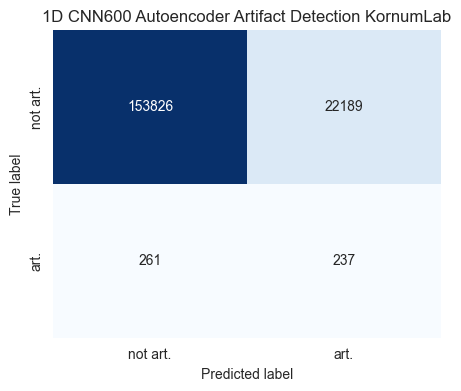

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.873,0.998,0.874,0.932
1,art.,0.873,0.011,0.476,0.021


In [92]:
confusion_matrix = np.array([
    [153826, 22189],
    [261, 237],
])
name = 'autoencoder_1D_CNN600_artifact_detection_kornum'
plot(confusion_matrix, f'{name}.png',
     '1D CNN600 Autoencoder Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)

In [93]:
latex_artifact_detection(confusion_matrix, name)


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/autoencoder_1D_CNN600_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:autoencoder_1D_CNN600_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 153826 & 22189  & 176015 \\
            art.   & 261  & 237  & 498 \\
            \midrule
            SUM   & 154087  & 22426  & 176513 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:autoencoder_1D_CNN600_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
      

# 1D-CNN1000 Autoencoder - Artifact detection - KornumLab

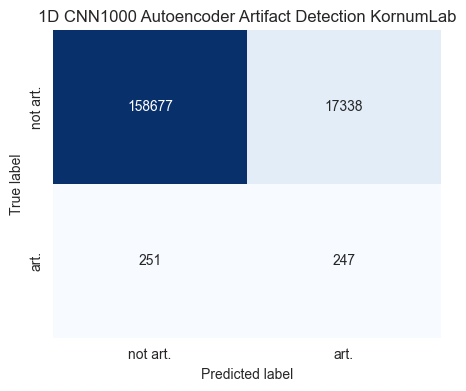

,Class,Accuracy,Precision,Recall,F1-Score
0,not art.,0.9,0.998,0.901,0.947
1,art.,0.9,0.014,0.496,0.027


In [94]:
confusion_matrix = np.array([
    [158677, 17338],
    [251, 247],
])
name = 'autoencoder_1D_CNN1000_artifact_detection_kornum'
plot(confusion_matrix, f'{name}.png',
     '1D CNN1000 Autoencoder Artifact Detection KornumLab')

results = metrics(confusion_matrix)
round(results, 3)

In [95]:
latex_artifact_detection(confusion_matrix, name)


    \begin{figure}[H]
        \centering
         \includegraphics[scale=0.8]{Pictures/autoencoder_1D_CNN1000_artifact_detection_kornum.png}
        \caption{{\color{red} Missing caption}}
        \label{fig:autoencoder_1D_CNN1000_artifact_detection_kornum}
    \end{figure}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{lrr|r}
            \toprule
                  & not art. & art.  & SUM \\
            \midrule
            not art. & 158677 & 17338  & 176015 \\
            art.   & 251  & 247  & 498 \\
            \midrule
            SUM   & 158928  & 17585  & 176513 \\
            \bottomrule
        \end{tabular}
        \caption{Artifact detection confusion matrix}
        \label{stat:autoencoder_1D_CNN1000_artifact_detection_kornum}
    \end{table}
    

    \begin{table}[H]
        \centering
        \begin{tabular}{l|rrrr|rrrr}
            \toprule
            Class &    TP &   FP &     TN &   FN &  Acc. &  Pre. &  Rec. &  F1 \\
            \midrule
   

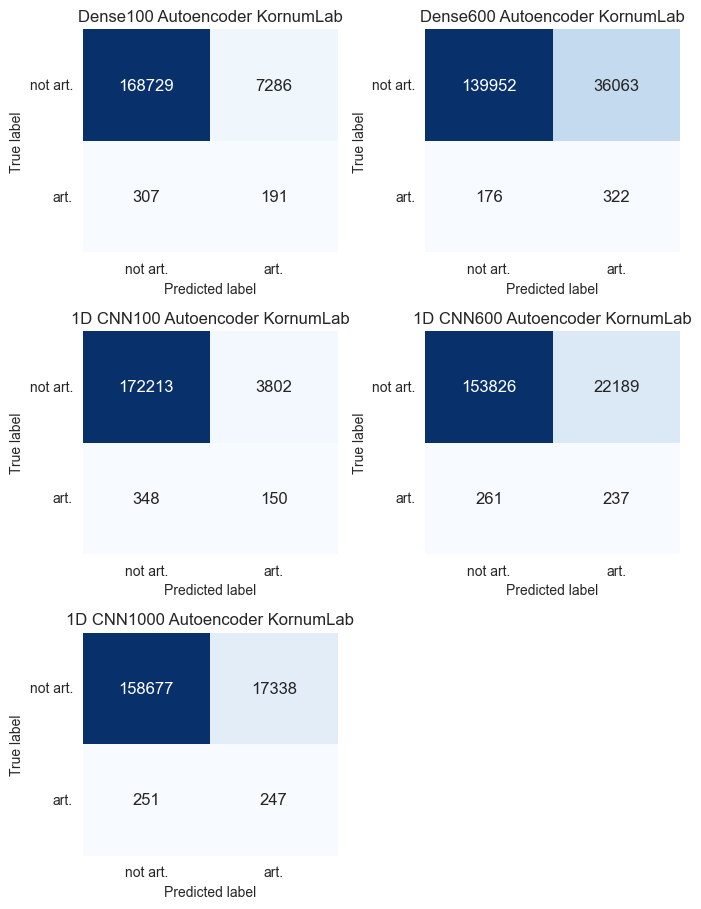

In [96]:
# Confusion matrices data
confusion_matrices = {
    "Dense100 Autoencoder KornumLab": np.array([[168729, 7286], [307, 191]]),
    "Dense600 Autoencoder KornumLab": np.array([[139952, 36063], [176, 322]]),
    "1D CNN100 Autoencoder KornumLab": np.array([[172213, 3802], [348, 150]]),
    "1D CNN600 Autoencoder KornumLab": np.array([[153826, 22189], [261, 237]]),
    "1D CNN1000 Autoencoder KornumLab": np.array([[158677, 17338], [251, 247]]),
}

# Plotting heatmaps
fig, axes = plt.subplots(3, 2, figsize=(7, 10))
# fig.suptitle('Confusion Matrices Artifact Detection')

for ax, (title, matrix) in zip(axes.flatten(), confusion_matrices.items()):
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False, annot_kws={"size": 12})
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticklabels(['not art.', 'art.'])
    ax.set_yticklabels(['not art.', 'art.'], rotation=0)

axes[-1,-1].axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('confusion_matrices_artifact_detection_autoencoders.png', dpi=500)
plt.show()
